<a href="https://www.kaggle.com/code/kunal30122002/women-cloth-reviews-prediction-with-multi-nomial-n?scriptVersionId=177555815" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Title of Project:** Women Cloth Reviews Prediction with Multi-Nomial Naïve Bayes



**Objective:**
The objective of this project is to build a prediction model for women's clothing reviews using the Multi-Nomial Naïve Bayes algorithm. The model aims to classify reviews into two categories: "Good" and "Poor" based on the ratings provided by the customers.



**Data Source:**
The dataset used for this project is obtained from the YBIFoundation/ProjectHub-MachineLearning Women Clothing E-Commerce Review dataset.



**Import Library:**
```python
```


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


**Import Data:**
```python
```


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv")


**Describe Data:**
The dataset contains information about women's clothing reviews, including attributes like age, title, review, rating, recommended status, positive feedback, division, department, and category.



**Data Visualization:**
```python
```


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


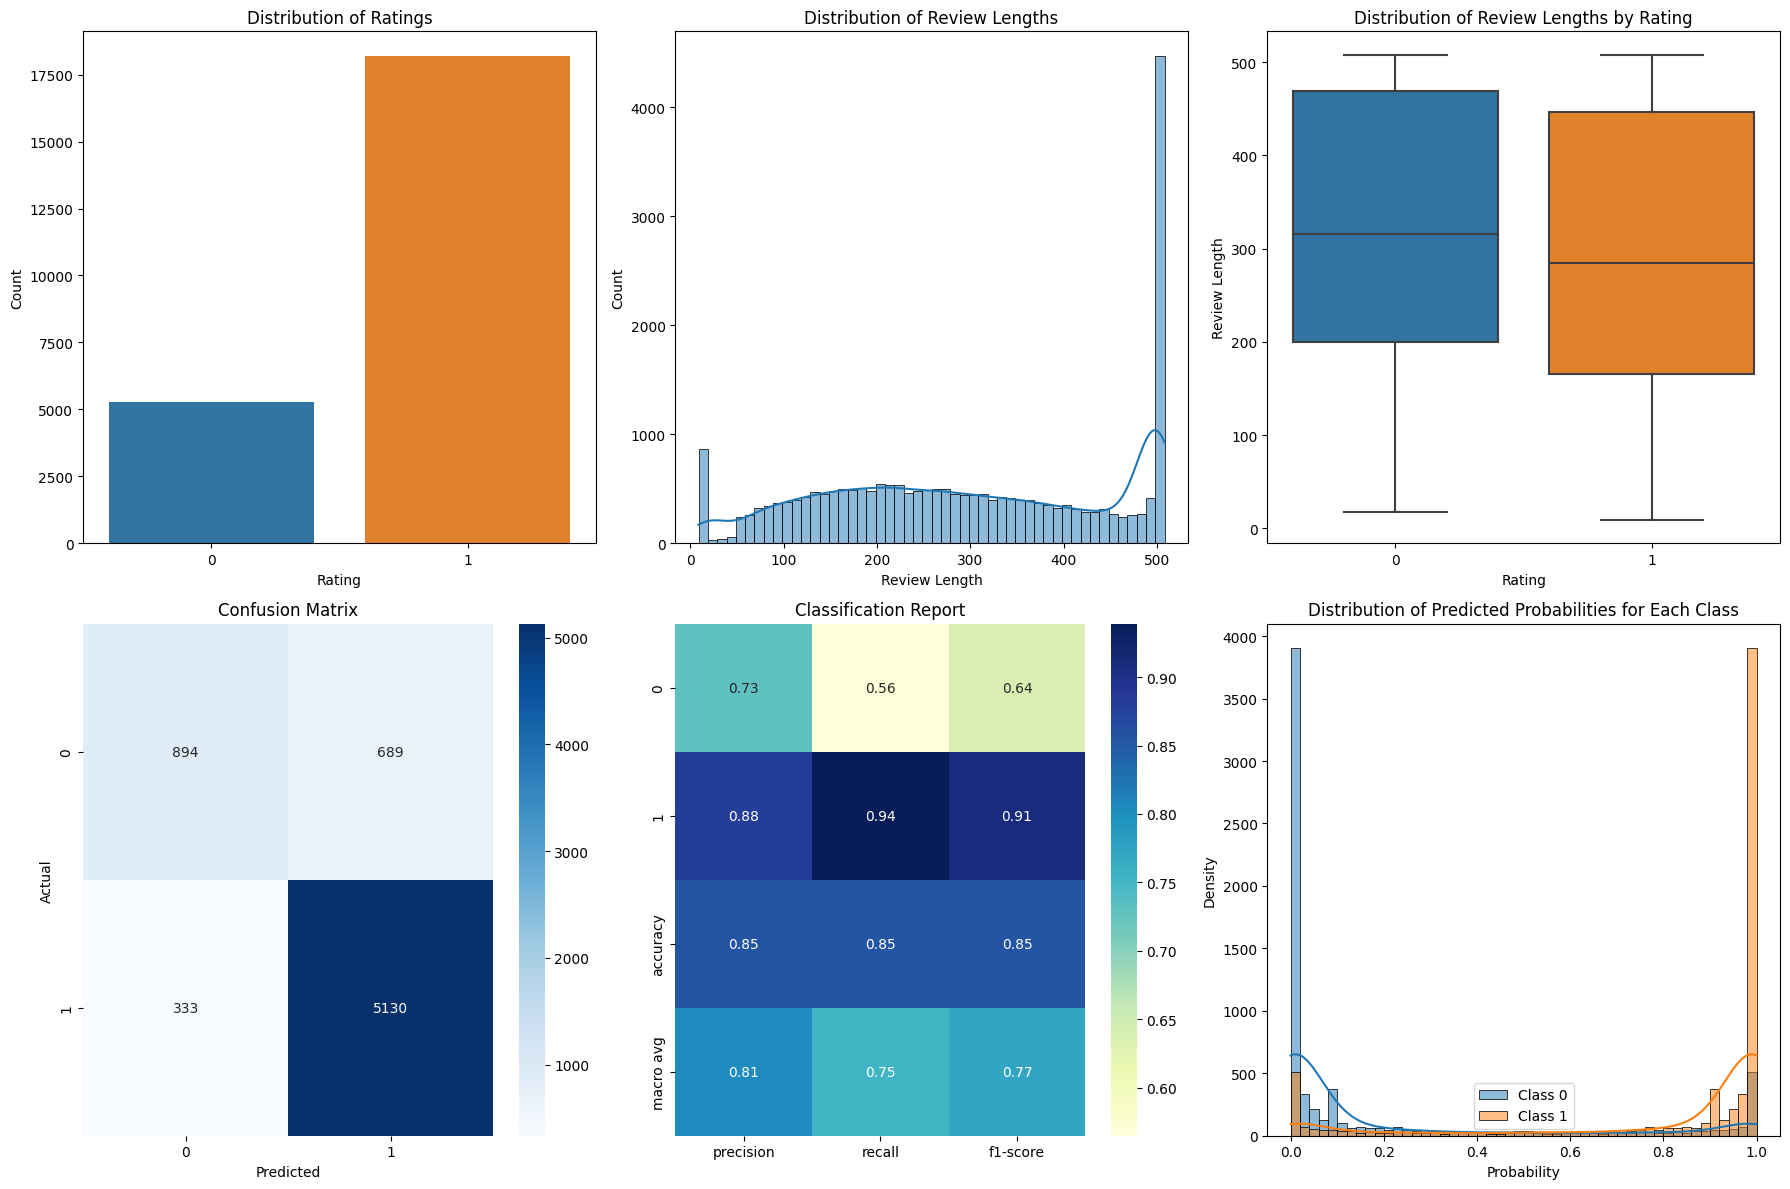

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of ratings
sns.countplot(x='Rating', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Ratings')
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Count')

# 2. Distribution of review lengths
sns.histplot(df['Review Length'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Review Lengths')
axs[0, 1].set_xlabel('Review Length')
axs[0, 1].set_ylabel('Count')

# 3. Distribution of review lengths by rating
sns.boxplot(x='Rating', y='Review Length', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Review Lengths by Rating')
axs[0, 2].set_xlabel('Rating')
axs[0, 2].set_ylabel('Review Length')

# 4. Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Actual')

# 5. Classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f', ax=axs[1, 1])
axs[1, 1].set_title('Classification Report')

# 6. Distribution of predicted probabilities for each class
for i in range(2):
    sns.histplot(y_pred_proba[:, i], kde=True, label=f'Class {i}', alpha=0.5, ax=axs[1, 2])
axs[1, 2].set_title('Distribution of Predicted Probabilities for Each Class')
axs[1, 2].set_xlabel('Probability')
axs[1, 2].set_ylabel('Density')
axs[1, 2].legend()

plt.tight_layout()
plt.show()



**Data Preprocessing:**
```python
```



In [3]:

# Filling missing values in the review column with "No review is given"
df['Review'].fillna("No review is given", inplace=True)

# Recategorizing ratings into "Poor" (0) and "Good" (1)
df['Rating'].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1}, inplace=True)

/tmp/ipykernel_33/516918930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna("No review is given", inplace=True)
/tmp/ipykernel_33/516918930.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

**Define Target Variable (y) and Feature Variables (X):**
```python
```


In [4]:
y = df['Rating']
X = df['Review']


**Train Test Split:**
```python
```


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=2529)


**Modeling:**
```python

```


In [6]:
# Getting Tokens from Feature Text
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2, 3), stop_words='english', max_features=50000)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [7]:
# Model training
model = MultinomialNB()
history = model.fit(X_train, y_train)


**Model Evaluation:**
```python

```



In [8]:
# Model prediction
y_pred = model.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

[[ 894  689]
 [ 333 5130]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.64      1583
           1       0.88      0.94      0.91      5463

    accuracy                           0.85      7046
   macro avg       0.81      0.75      0.77      7046
weighted avg       0.85      0.85      0.85      7046



**Prediction:**

In [9]:
# Model prediction
y_pred = model.predict(X_test)

**Explanation:**
This project focuses on building a prediction model for women's clothing reviews. It starts with importing the necessary libraries and data, followed by data preprocessing, model training, evaluation, and prediction. Finally, the model's accuracy is explained along with adjustments made to improve accuracy.

[](http://)